In [1]:
import PIL
from PIL import Image
from matplotlib import pyplot as plt
import os
import random
import numpy as np

with open("../domain-generalization-for-anomaly-detection/config.yml", 'r', encoding="utf-8") as f:
    import yaml
    config = yaml.load(f.read(), Loader=yaml.FullLoader)
class_to_idx = config["PACS_class_to_idx"]
domain_to_idx = config["PACS_domain_to_idx"]


In [2]:
mvtec_in = ['contrast', 'origin', 'defocus_blur', 'brightness']
mvtec_ood = ['gaussian_noise']
images = []

for idx, domain in enumerate(mvtec_in):
    path = f"{config['mvtec_ood_root']}/mvtec_{domain}/bottle/test/good"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

for idx, domain in enumerate(mvtec_in):
    anomaly_type = ["broken_small", "broken_large", "contamination"][idx % 3]
    path = f"{config['mvtec_ood_root']}/mvtec_{domain}/bottle/test/{anomaly_type}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))


In [3]:

for idx, domain in enumerate(mvtec_ood * 4):
    path = f"{config['mvtec_ood_root']}/mvtec_{domain}/bottle/test/good"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

for idx, domain in enumerate(mvtec_ood * 4):
    anomaly_type = ["broken_small", "broken_large", "contamination"][idx % 3]
    path = f"{config['mvtec_ood_root']}/mvtec_{domain}/bottle/test/{anomaly_type}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

In [4]:
PACS_in = ["photo", "art_painting", "cartoon", "photo"]
PACS_ood = ["sketch"]
PACS_normal = ["dog"]
PACS_anomaly = ['person', 'horse', 'elephant', 'giraffe', 'guitar', 'house']

for idx, domain in enumerate(PACS_in):
    path = f"{config['PACS_root']}/train/{domain}/{PACS_normal[0]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

for idx, domain in enumerate(PACS_in):
    path = f"{config['PACS_root']}/train/{domain}/{PACS_anomaly[idx]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[8 - idx]}'))

In [5]:
for idx, domain in enumerate(PACS_ood * 4):
    path = f"{config['PACS_root']}/train/{domain}/{PACS_normal[0]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

for idx, domain in enumerate(PACS_ood * 4):
    path = f"{config['PACS_root']}/train/{domain}/{PACS_anomaly[idx]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[8 - idx]}'))


In [6]:
MNIST_in = ["MNIST", "MNIST_M", "SVHN", "MNIST"]
MNIST_ood = ["SYN"]
MNIST_normal = [0]
MNIST_anomaly = [1, 2, 3, 4, 5, 6 ,7 ,8 ,9]

for idx, domain in enumerate(MNIST_in):
    path = f"{config[f'{domain}_root']}/train/{MNIST_normal[0]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

for idx, domain in enumerate(MNIST_in):
    path = f"{config[f'{domain}_root']}/train/{MNIST_anomaly[idx]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

In [7]:
for idx, domain in enumerate(MNIST_ood * 4):
    path = f"{config[f'{domain}_root']}/train/{MNIST_normal[0]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

for idx, domain in enumerate(MNIST_ood * 4):
    path = f"{config[f'{domain}_root']}/train/{MNIST_anomaly[idx]}"
    images.append(Image.open(f'{path}/{os.listdir(path)[idx]}'))

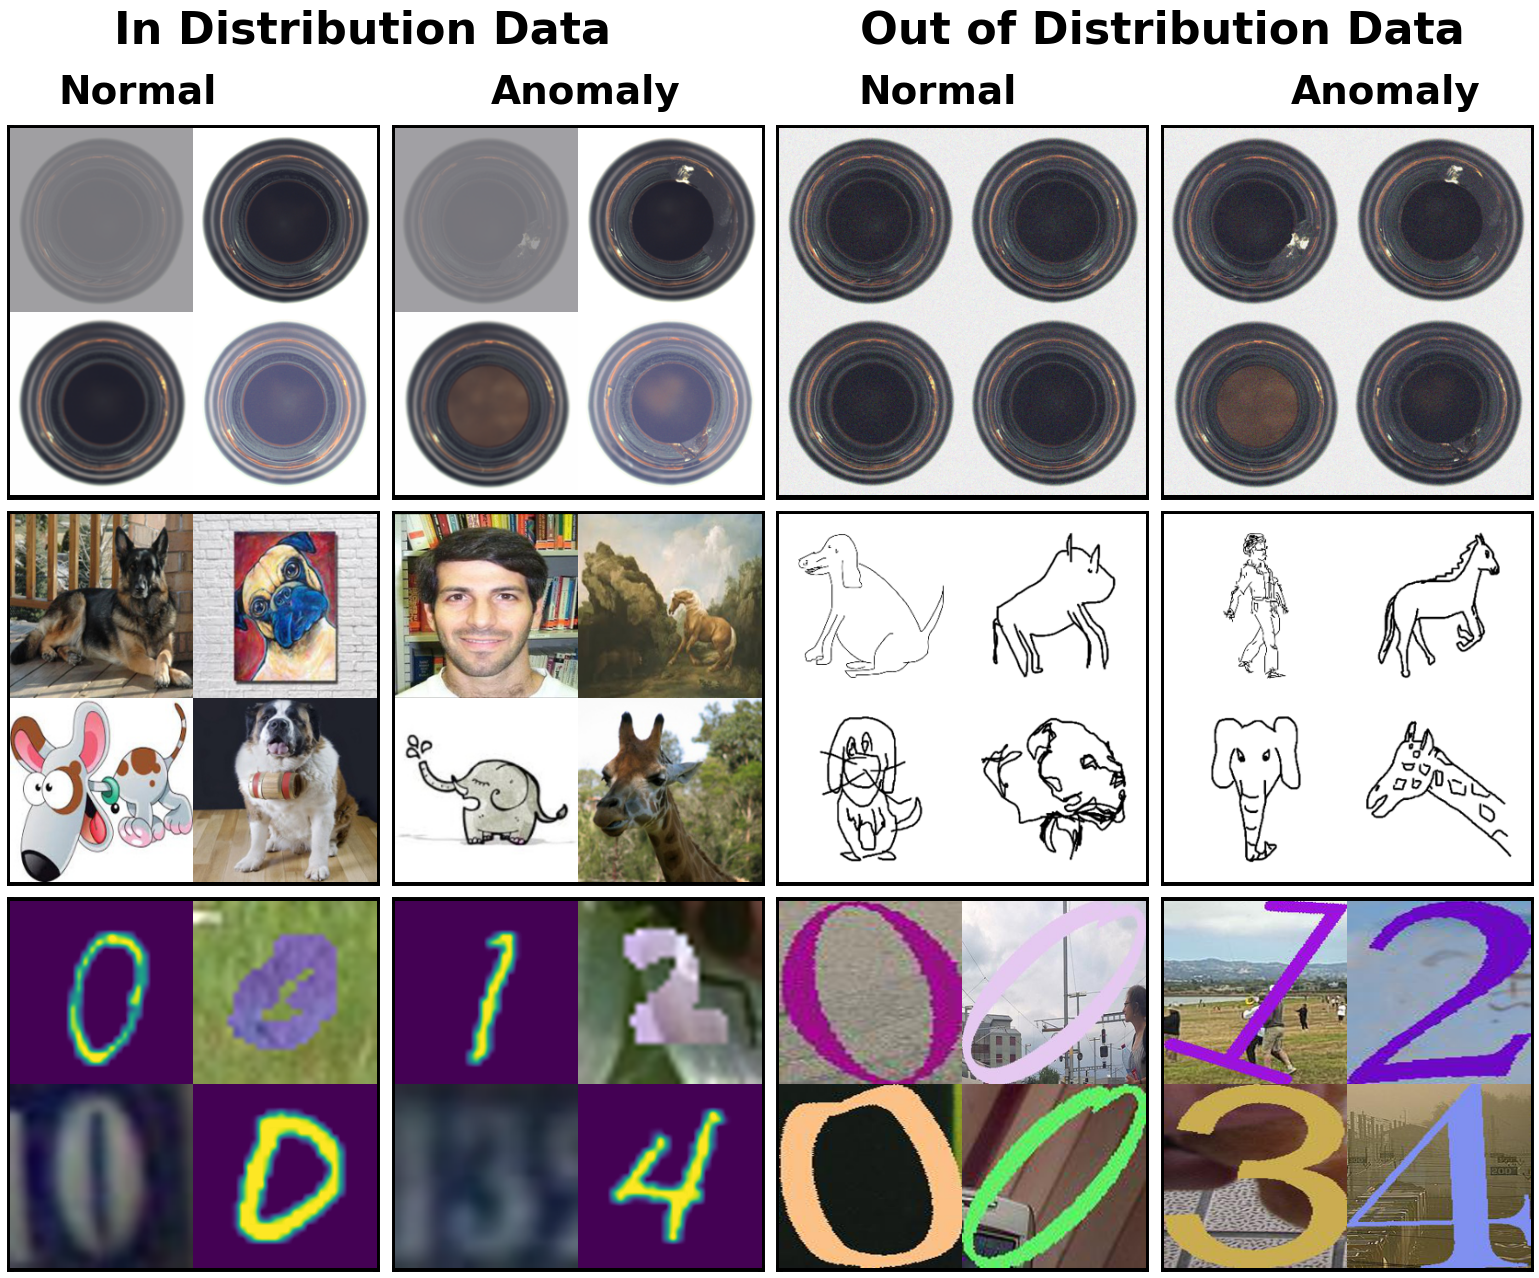

In [16]:

# 假设 images 已经是一个包含 PIL Image 对象的列表
image_size = (200, 200)
rows = 6  # 总行数
cols = 8  # 总列数
group_size = 2  # 每个组是 2×2
border_thickness = 5  # 设定外边框的宽度

# 计算组的行数和列数
group_rows = rows // group_size
group_cols = cols // group_size

fig, axes = plt.subplots(group_rows, group_cols, figsize=(cols * 2, rows * 2),
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.05})  # 组间有微小间隔

# fig.patch.set_edgecolor("black")  # 设置整体外边框颜色
# fig.patch.set_linewidth(border_thickness)  # 设置整体外边框宽度

# 逐个填充 2x2 组
image_index = 0
for row in range(group_rows):
    for col in range(group_cols):
        if image_index >= len(images):
            break  # 防止超出图片数量

        # 创建 2x2 组
        subfig = fig.add_subplot(axes[row, col])
        subfig.set_xticks([])  # 隐藏坐标轴
        subfig.set_yticks([])
        subfig.set_frame_on(True)  # 让外框可见
        subfig.spines['top'].set_color('black')
        subfig.spines['bottom'].set_color('black')
        subfig.spines['left'].set_color('black')
        subfig.spines['right'].set_color('black')
        subfig.spines['top'].set_linewidth(border_thickness)
        subfig.spines['bottom'].set_linewidth(border_thickness)
        subfig.spines['left'].set_linewidth(border_thickness)
        subfig.spines['right'].set_linewidth(border_thickness)

        # 创建小图 (2x2)
        gs = subfig.get_subplotspec().subgridspec(2, 2, wspace=0, hspace=0)
        for i in range(2):
            for j in range(2):
                if image_index < len(images):
                    img = images[image_index].resize(image_size)
                    ax = fig.add_subplot(gs[i, j])
                    ax.imshow(img)
                    ax.axis('off')  # 关闭坐标轴
                    ax.set_xticks([])  # 隐藏坐标轴
                    ax.set_yticks([])
                    image_index += 1
                else:
                    ax = fig.add_subplot(gs[i, j])
                    ax.axis('off')  # 隐藏空的子图


# 调整布局
# 添加标题文本（横跨两列）
fig.text(0.22, 1.02, 'In Distribution Data', fontsize=32, fontweight='bold', ha='center')
fig.text(0.72, 1.02, 'Out of Distribution Data', fontsize=32, fontweight='bold', ha='center')

# 添加每列的子标题
fig.text(0.08, 0.97, 'Normal', fontsize=28, fontweight='bold', ha='center')
fig.text(0.36, 0.97, 'Anomaly', fontsize=28, fontweight='bold', ha='center')
fig.text(0.58, 0.97, 'Normal', fontsize=28, fontweight='bold', ha='center')
fig.text(0.86, 0.97, 'Anomaly', fontsize=28, fontweight='bold', ha='center')

# 调整布局
plt.subplots_adjust(left=0, right=0.95, top=0.95, bottom=0, wspace=0, hspace=0)
# 保存合并后的图片
plt.savefig("data_images.pdf", bbox_inches='tight', pad_inches=0.1, dpi=300, facecolor=fig.get_facecolor())
plt.show()